In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('ClientsData.csv')

In [3]:
data.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_DLQ_NUM,TARGET
0,49,1,0,1,2,1,5000.0,1,1,2,0
1,32,1,0,1,3,3,12000.0,1,1,1,0
2,52,1,0,1,4,0,9000.0,2,1,0,0
3,39,1,0,1,1,1,25000.0,1,1,3,0
4,30,1,0,0,0,0,12000.0,2,1,2,0


In [4]:
data.shape

(15223, 11)

<Axes: >

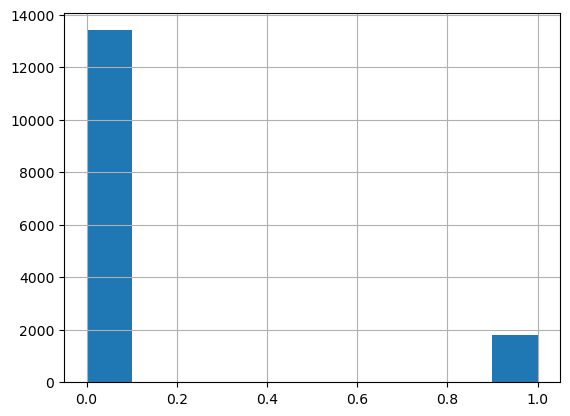

In [9]:
data.TARGET.hist()

In [15]:
len(data[data.TARGET==0]),len(data[data.TARGET==1])

(13411, 1812)

In [5]:
from sklearn.model_selection import train_test_split

X = data.drop('TARGET', axis=1)
y = data['TARGET']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=123)
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, train_size=0.7, random_state=123)

In [51]:
model = KNeighborsClassifier(n_neighbors = 9)
model.fit(Xtrain,ytrain)
knn_y_pred = model.predict(Xtrain)
print('Матрица ошибок: \n',confusion_matrix(ytrain,knn_y_pred))
print('Точность: \n',precision_score(ytrain,knn_y_pred))
print('Полнота: \n',recall_score(ytrain,knn_y_pred))

Матрица ошибок: 
 [[6543   16]
 [ 872   28]]
Точность: 
 0.6363636363636364
Полнота: 
 0.03111111111111111


In [144]:
model = KNeighborsClassifier(n_neighbors = 9)
model.fit(Xtest,ytest)
knn_y_pred = model.predict(Xtest)
print('Матрица ошибок: \n',confusion_matrix(ytest,knn_y_pred))
print('Точность: \n',precision_score(ytest,knn_y_pred))
print('Полнота: \n',recall_score(ytest,knn_y_pred))

Матрица ошибок: 
 [[3992   16]
 [ 541   18]]
Точность: 
 0.5294117647058824
Полнота: 
 0.03220035778175313


In [76]:
len(ytrain[ytrain==1]),len(ytrain[ytrain==0])

(900, 6559)

In [95]:
model_log = LogisticRegression()
model_log.fit(Xtrain,ytrain)
log_y_pred = model_log.predict(Xtrain)
print('Матрица ошибок: \n',confusion_matrix(ytrain,log_y_pred))
print('Точность: \n',precision_score(ytrain,log_y_pred))
print('Полнота: \n',recall_score(ytrain,log_y_pred))

Матрица ошибок: 
 [[6558    1]
 [ 899    1]]
Точность: 
 0.5
Полнота: 
 0.0011111111111111111


In [96]:
log_test = model_log.predict(Xtest)
print('Матрица ошибок: \n',confusion_matrix(ytest,log_test))
print('Точность: \n',precision_score(ytest,log_test))
print('Полнота: \n',recall_score(ytest,log_test))


Матрица ошибок: 
 [[4008    0]
 [ 559    0]]
Точность: 
 0.0
Полнота: 
 0.0


In [32]:
len(ytrain[ytrain==1]),len(ytrain[ytrain==0])

(900, 6559)

In [74]:
probe = model_log.predict_proba(Xtest)
probe[probe[:,1]>0.5][:10]

array([], shape=(0, 2), dtype=float64)

In [206]:
print('В выборке ytest точность и полнота получились равные "0", потому что TP равно "0"')

Ответ на вопрос
В выборке ytest  точность и полнота получились равные "0", потому что TP равно "0"


In [140]:
probs_val = model_log.predict_proba(Xval)[:,1]

max_recall = -1
thr = -1
prec = -1

for threshold in np.arange(0.05, 1, 0.001):
    classes = (probs_val>threshold).astype(int)

    if (precision_score(yval,classes) >= 0.13)&(recall_score(yval,classes)>max_recall):
        max_recall = recall_score(yval,classes)
        thr = threshold
        prec = precision_score(yval,classes)

print(f'Порог: {thr}')
print('Полнота: \n',max_recall)
print('Точность: \n',prec)

Порог: 0.07300000000000002
Полнота: 
 0.8696883852691218
Точность: 
 0.1310285958173282


In [141]:
proba = model_log.predict_proba(Xtest)[:,1]
predict = []

for i in range(len(proba)):
    pred = (proba[i]>=thr).astype(int)
    predict.append(pred)

print('Матрица ошибок: \n',confusion_matrix(ytest,predict))
print('Точность: \n',precision_score(ytest,predict))
print('Полнота: \n',recall_score(ytest,predict))

Матрица ошибок: 
 [[1152 2856]
 [ 104  455]]
Точность: 
 0.13742071881606766
Полнота: 
 0.813953488372093


In [146]:
print('Мы смогли добиться большего значения recall. Полнота нашей модели составила 0.81, а у knn 0.03')

Мы смогли добиться большего значения recall. Полнота нашей модели составила 0.81, а у knn 0.03


In [163]:
regs = []
recalls = []
thresholds = []
precisions = []

for reg in np.arange(0.001, 1, 0.01):

    model_log_c = LogisticRegression(C=reg,random_state=42)
    model_log_c.fit(Xval,yval)

    probs_val = model_log_c.predict_proba(Xval)[:,1]

    best_recall = -1
    best_thr = -1
    best_prec = -1


    for threshold in np.arange(0.05, 0.25, 0.001):
        classes = (probs_val>threshold).astype(int)
        rec = recall_score(yval,classes)
        precision = precision_score(yval,classes)

        if (precision >= 0.13) and (rec>best_recall):
            best_recall = rec
            best_thr = threshold
            best_prec = precision
            best_c = reg

    recalls.append(best_recall)
    thresholds.append(best_thr)
    precisions.append(best_prec)
    regs.append(best_c)

In [191]:
recalls_best = -1
precisions_best = -1


for i in range(len(precisions)):
    if precisions[i]>0.13 and recalls[i]>recalls_best:
        precisions_best_id =i


best_precisions = precisions[precisions_best_id]
best_recalls = recalls[precisions_best_id]
best_thresholds = thresholds[precisions_best_id]
best_regs = regs[precisions_best_id]


print(f'Наилучшее значение для точности: {best_precisions}')
print(f'Полнота: {best_recalls}')
print(f'Порог: {best_thresholds}')
print(f'Значение С: {best_regs}')  

Наилучшее значение для точности: 0.13039796782387808
Полнота: 0.8725212464589235
Порог: 0.06200000000000001
Значение С: 0.9909999999999999


In [195]:
model_log_best = LogisticRegression(C=best_thresholds)
model_log_best.fit(Xtrain,ytrain)
proba = model_log_best.predict_proba(Xtest)[:,1]

for i in range(len(proba)):
    predict = (proba>=best_thresholds).astype(int)

print('Матрица ошибок: \n',confusion_matrix(ytest,predict))
print('Точность: \n',precision_score(ytest,predict))
print('Полнота: \n',recall_score(ytest,predict))

Матрица ошибок: 
 [[ 861 3147]
 [  73  486]]
Точность: 
 0.1337737407101569
Полнота: 
 0.8694096601073346


In [201]:
print('Изменение гаперпараметра С на качество меодели влияет. Точность незначительно улучшилось, но полнота стала гораздо лучше\n(у прошлой модели было 0.81, а новой модели с применением гипермараметра С составила 0.87)')

Изменение гаперпараметра С на качество меодели влияет. Точность незначительно улучшилось, но полнота стала гораздо лучше
(у прошлой модели было 0.81, а новой модели с применением гипермараметра С составила 0.87)


In [205]:
print('При помощи логистической регрессии и подбора порога удалось превзойти качество метода ближайших соседей в этой задаче. Оба гиперпараметра положительно отыграли на качество моели')
print('Задача поставленная заказчиком была выполнена в полной мере')

Ответ на 1 вопрос:
При помощи логистической регрессии и подбора порога удалось превзойти качество метода ближайших соседей в этой задаче. Оба гиперпараметра положительно отыграли на качество моели
Ответ на 2 вопрос:
Задача поставленная заказчиком была выполнена в полной мере
